## HEART FAILURE

Heart failure (HF) is a clinical syndrome in which the heart cannot pump and/or fill sufficiently to meet the body’s metabolic needs. It is a major and growing global public-health problem: roughly 64 million people worldwide live with HF, and in high-income countries prevalence is rising alongside aging populations and increasing survival after heart attacks. HF arises from a range of underlying cardiac disorders — most commonly coronary (ischemic) heart disease and long-standing hypertension — but also from cardiomyopathies, valvular disease, arrhythmias, diabetes, obesity, chronic kidney disease, and infiltrative disorders such as cardiac amyloidosis. Because many of these causes share modifiable risk factors (hypertension, diabetes, smoking, sedentary lifestyle, and obesity), early detection and risk-factor control are central to preventing HF and improving outcomes. This project aims to predict incident or prevalent HF using routinely available clinical and laboratory features so that patients at high risk can be identified for timely intervention.


### PROJECT OUTLINE

1. Project Overview

2. Setting Up the Environment

3. Understanding the Dataset

4. Exploring the Data

5. Preparing Data for Modeling

6. Building and Testing Predictive Models

7. Results and Final Takeaways

### Dataset Overview

The dataset used for this project contains clinical records of patients with heart failure, collected during their follow-up period. It includes key demographic, physiological, and laboratory features that can help predict the likelihood of heart failure events or mortality.

**Feature Descriptions:**

* **age** – Age of the patient (in years).
* **anaemia** – Indicates whether the patient’s haemoglobin level is below the normal range (1 = Yes, 0 = No).
* **creatinine_phosphokinase** – Level of creatine phosphokinase (CPK) enzyme in the blood, measured in mcg/L.
* **diabetes** – Indicates whether the patient has diabetes (1 = Yes, 0 = No).
* **ejection_fraction** – Percentage of blood the left ventricle pumps out with each contraction (%).
* **high_blood_pressure** – Indicates whether the patient has hypertension (1 = Yes, 0 = No).
* **platelets** – Platelet count in the blood, measured in kiloplatelets/mL.
* **serum_creatinine** – Concentration of creatinine in the blood, measured in mg/dL.
* **serum_sodium** – Concentration of sodium in the blood, measured in mEq/L.
* **sex** – Biological sex of the patient (1 = Male, 0 = Female).
* **smoking** – Indicates whether the patient is or has been a smoker (1 = Yes, 0 = No).
* **time** – Duration of follow-up period (in months).
* **DEATH_EVENT** – Indicates whether the patient died during the follow-up period (1 = Death occurred, 0 = Survived).


### Setting Up the Environment

##### Importing Library

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

##### Loading data

In [15]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##### Understanding the Dataset

In [16]:
# Summary statistics for numerical columns
print("\n----- Statistical Summary -----")
data.describe().T


----- Statistical Summary -----


,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [17]:
# Count of missing values
print("\n----- Missing Values -----")
print(data.isnull().sum())


----- Missing Values -----
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


##### Exploring the Data

Exploratory Data Analysis focuses on understanding the dataset through visualization and summary statistics.

Key Steps:

Target Variable Check – Plot a count plot of DEATH_EVENT to see class balance between survivors and non-survivors.
Feature Exploration – Use histograms or boxplots to examine distributions of key variables like age, ejection_fraction, and serum_creatinine.
Correlation Analysis – Create a correlation heatmap to identify relationships between features and highlight those most associated with heart failure outcomes.

These steps help identify important predictors and guide feature selection for the modeling phase.

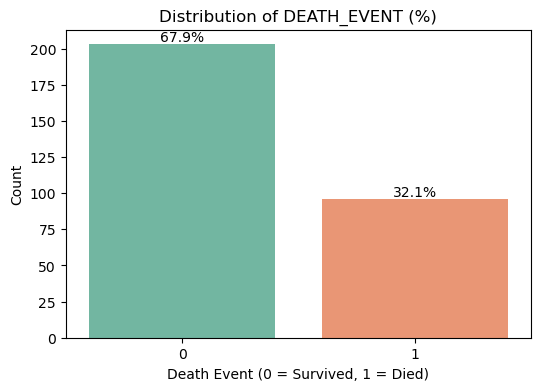

In [18]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
plt.figure(figsize=(6,4))
ax = sns.countplot(x="DEATH_EVENT", data=data, palette="Set2")

# Calculate percentages
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

plt.title("Distribution of DEATH_EVENT (%)")
plt.xlabel("Death Event (0 = Survived, 1 = Died)")
plt.ylabel("Count")
plt.show()

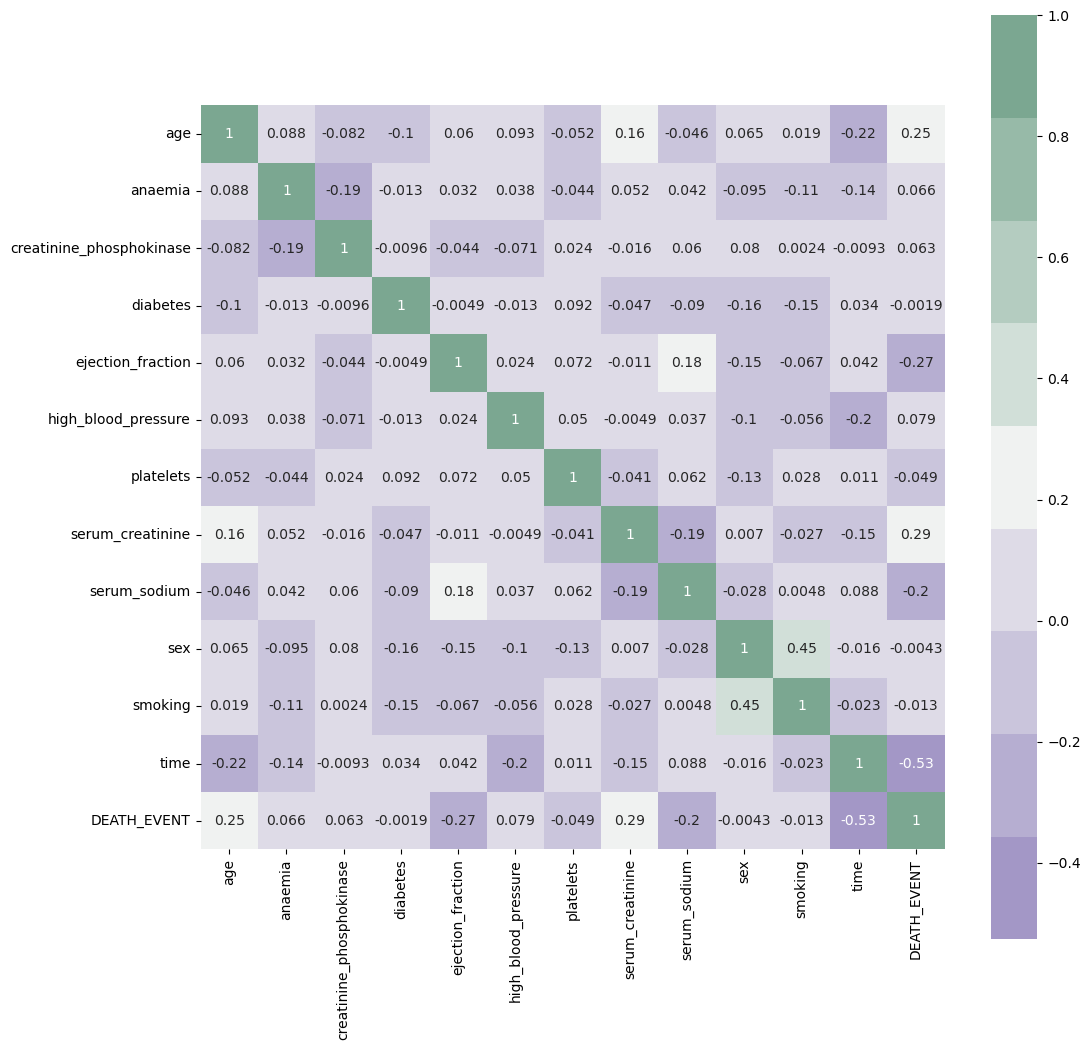

In [20]:
#Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

Next, we will examine the count plot of age.

Text(0.5, 1.0, 'Distribution Of Age')

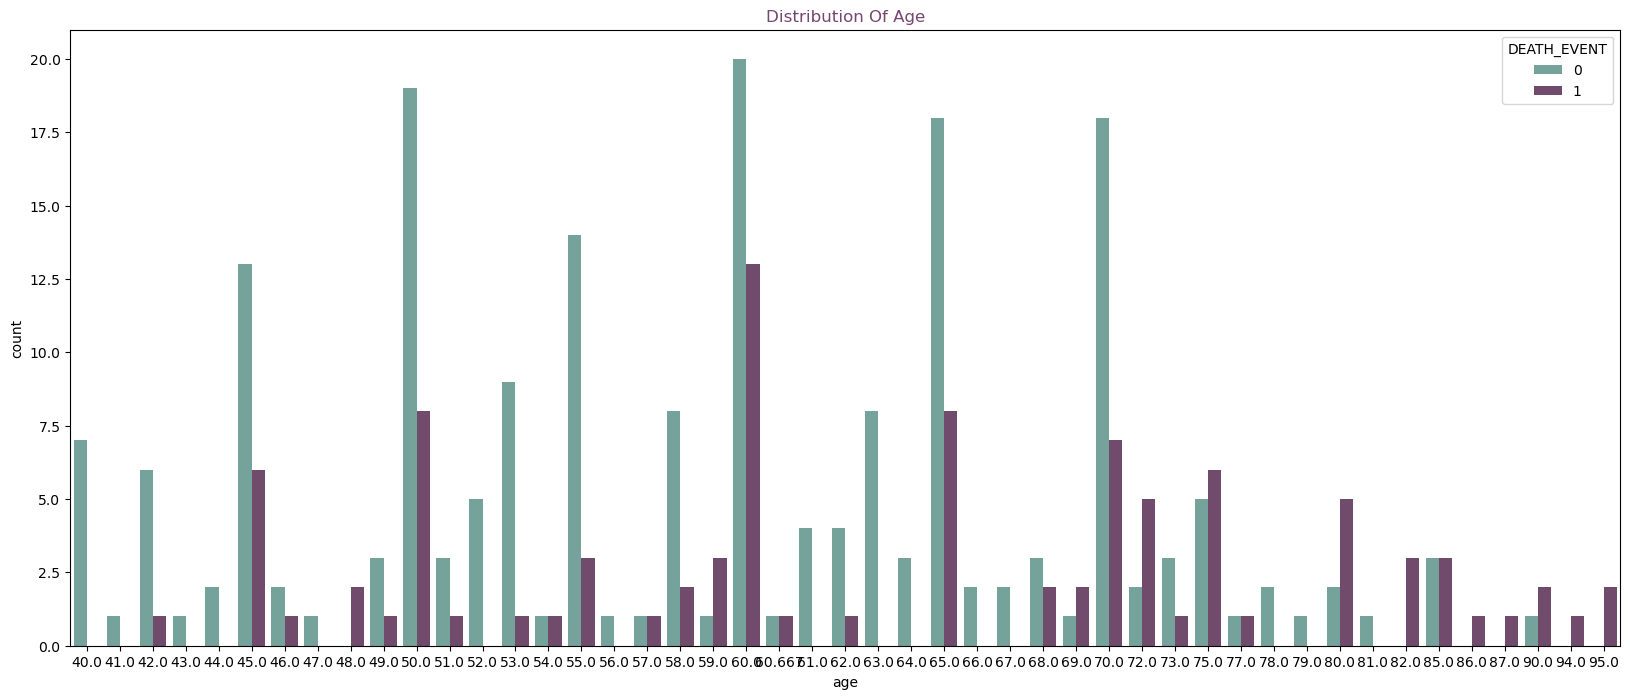

In [23]:
#Evauating age distrivution 
plt.figure(figsize=(20,8))
#colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
Days_of_week=sns.countplot(x=data['age'],data=data, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

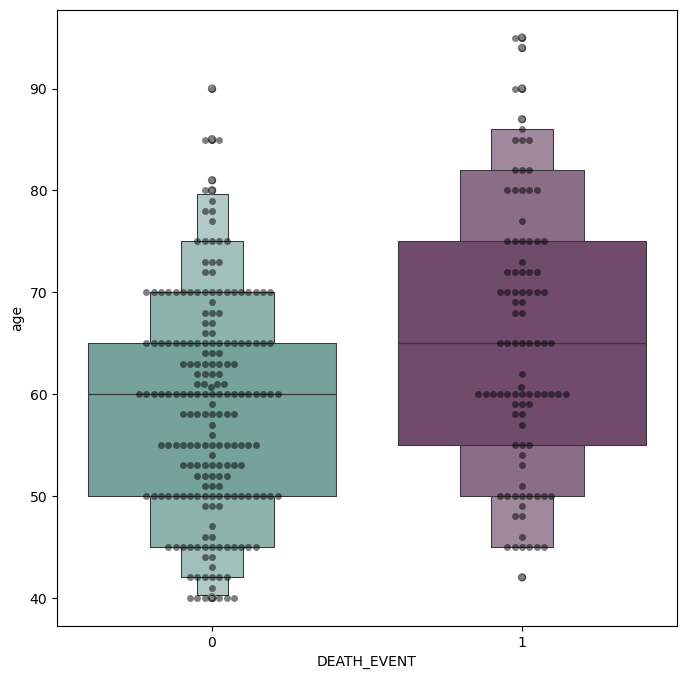

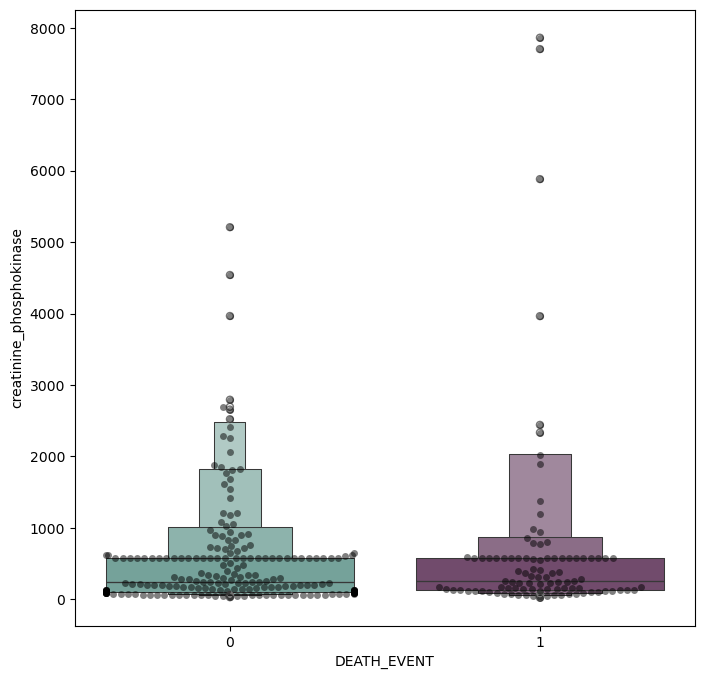

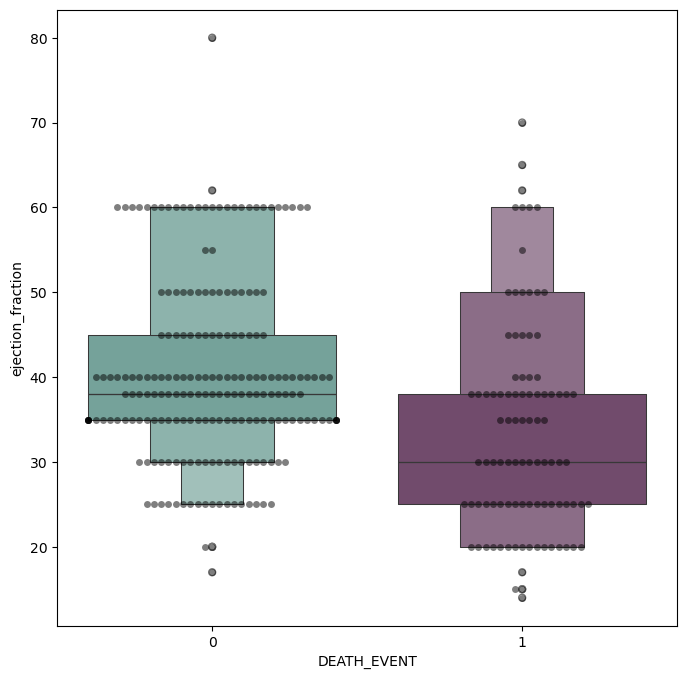

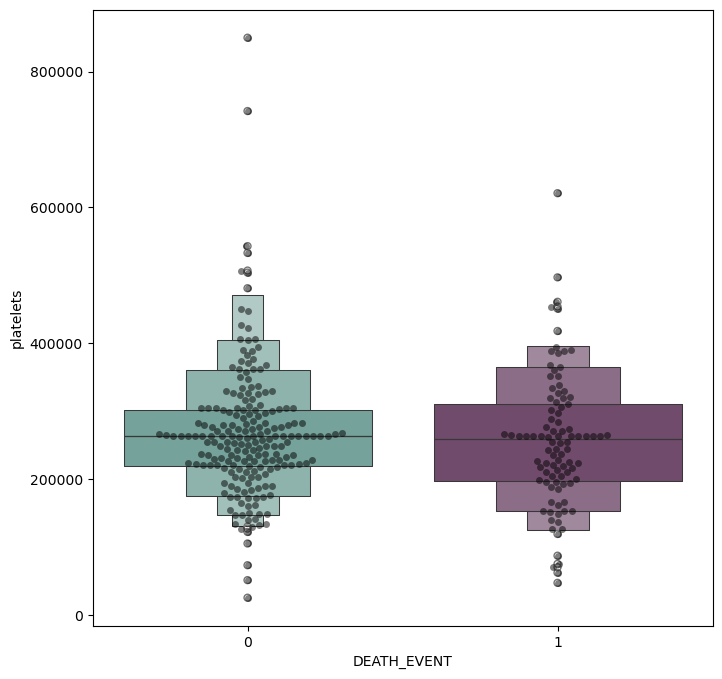

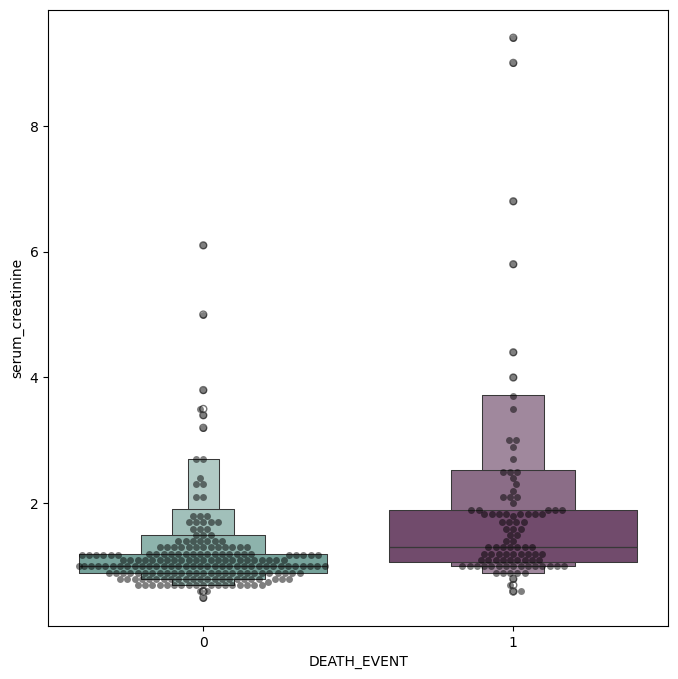

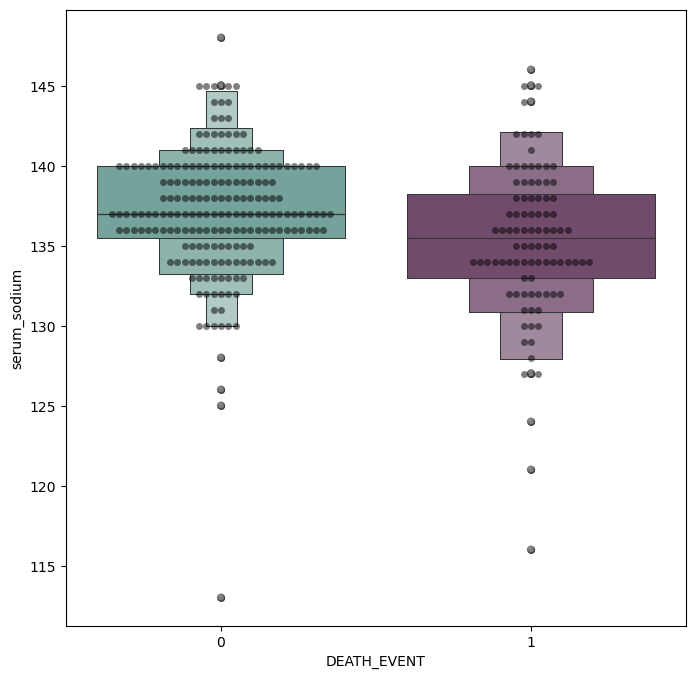

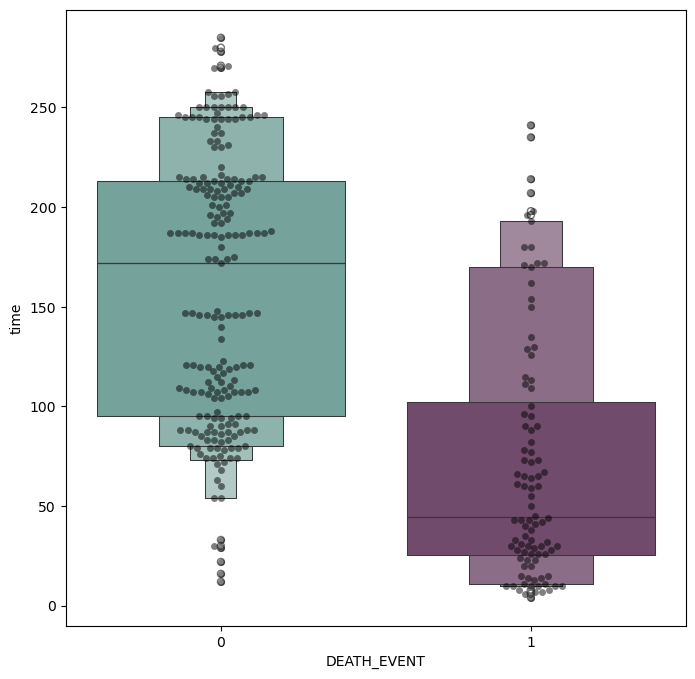

In [24]:
# Boxen and swarm plot of some non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=data["DEATH_EVENT"], y=data[i], color="black", alpha=0.5)
    sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)
    plt.show()

Next, we examine the kdeplot of time and age as they both are significant features.

<Axes: xlabel='time', ylabel='age'>

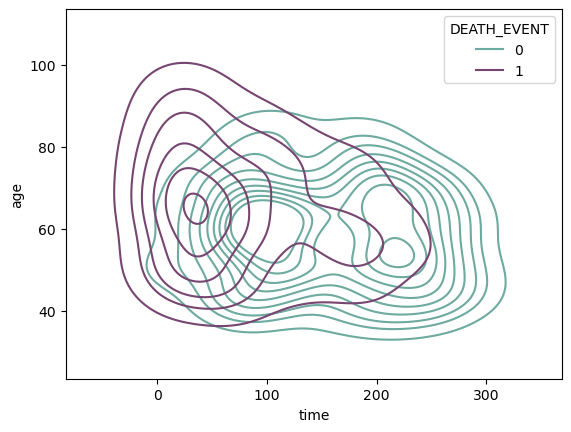

In [25]:
sns.kdeplot(x=data["time"], y=data["age"], hue =data["DEATH_EVENT"], palette=cols)

##### Preparing Data for Modeling

Data preprocessing is a crucial step to prepare the dataset for modeling. The main steps include:

* **Outlier Handling** – Remove or treat outliers identified during data analysis to improve model performance.
* **Feature and Target Assignment** – Separate the independent variables (X) from the target variable (y).
* **Feature Scaling** – Normalize or standardize numerical features to ensure all variables contribute equally to the model.
* **Train-Test Split** – Divide the dataset into training and testing subsets to evaluate model performance on unseen data.

In [26]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [27]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


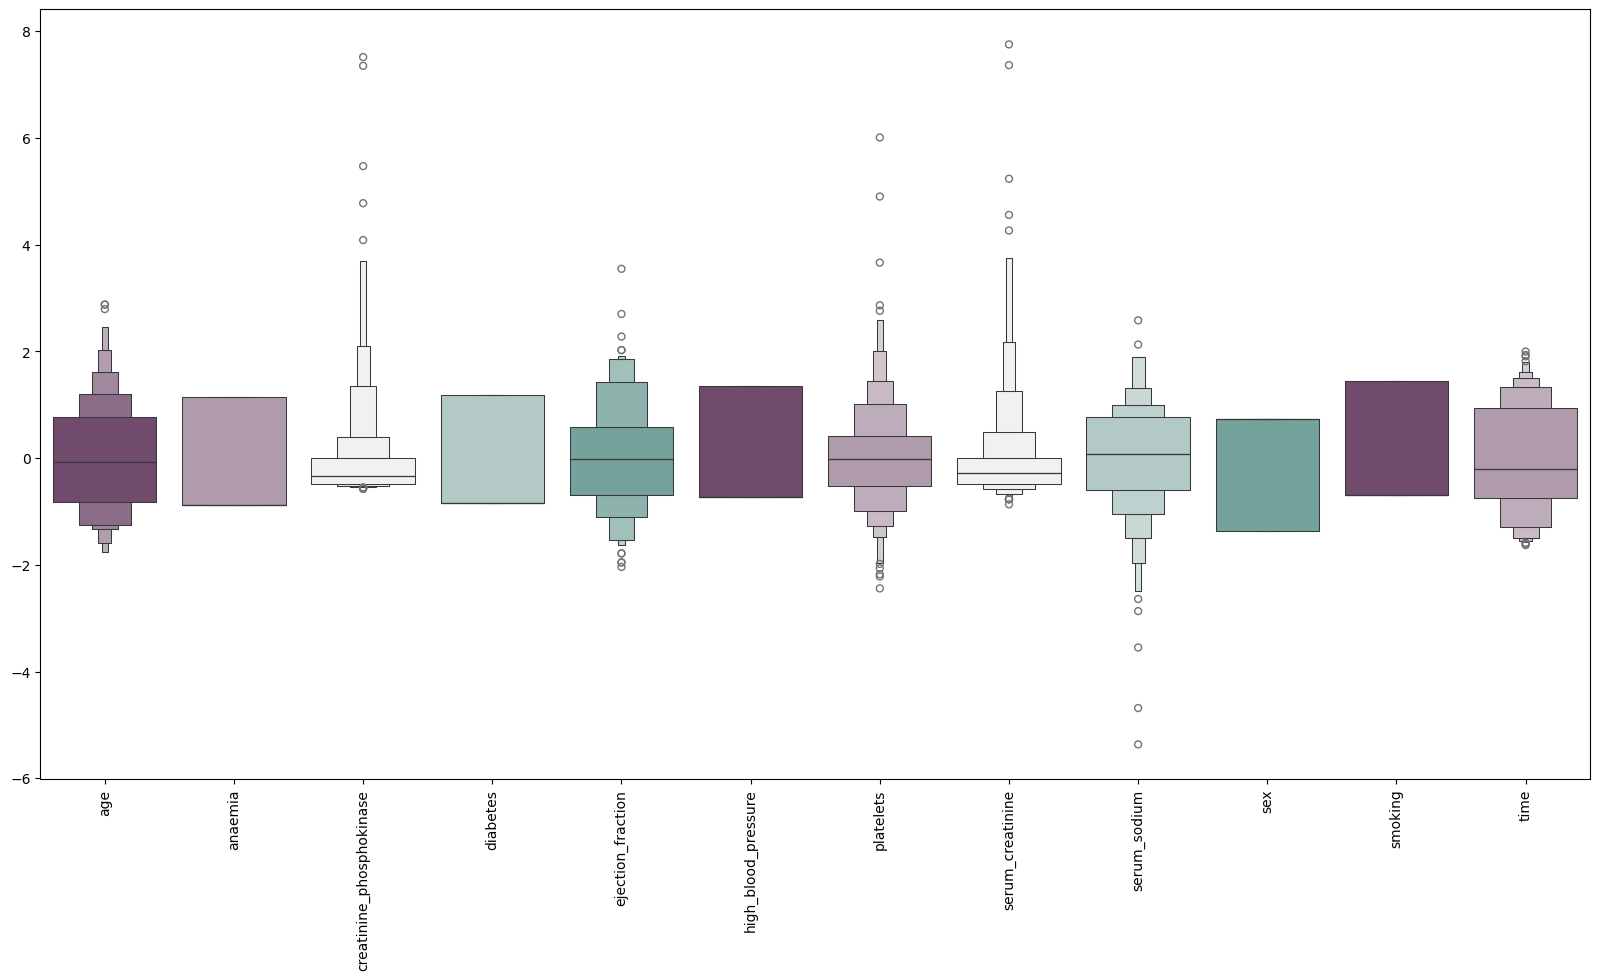

In [28]:
#looking at the scaled features
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [29]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

##### Building and Testing Predictive Models

In this project, we implement an Artificial Neural Network (ANN) to predict heart failure. The main steps involved are:

* **Initialize the ANN** – Set up the model structure and define input dimensions.
* **Add Layers** – Construct the network by adding hidden layers with activation functions and an output layer suitable for binary classification.
* **Compile the ANN** – Specify the optimizer, loss function, and evaluation metrics.
* **Train the ANN** – Fit the model on the training data and validate performance using the test set.

This structured approach allows the network to learn complex patterns and relationships in the dataset for accurate predictions.

What is happening in the code:

**What it does**

* **EarlyStopping** is a Keras callback used to stop training when the model stops improving.

* **min_delta** =0.001

The model only considers an improvement if the change in the monitored metric (like validation loss) is greater than 0.001.

* **patience** =20

If the model doesn’t improve for 20 consecutive epochs, training will stop early.

* **restore_best_weights** =True

After stopping, the model weights are rolled back to the epoch with the best performance, instead of the last epoch.

**Why use it**

* Prevents overfitting by stopping training once the model stops learning meaningful patterns.

* Saves time by not training unnecessary epochs.

* Ensures the model keeps the best weights for predictions.

In [30]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initializing the Neural Network 
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6425 - loss: 0.6928 - val_accuracy: 0.6667 - val_loss: 0.6922
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6480 - loss: 0.6920 - val_accuracy: 0.6667 - val_loss: 0.6915
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6480 - loss: 0.6913 - val_accuracy: 0.6667 - val_loss: 0.6906
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6480 - loss: 0.6906 - val_accuracy: 0.6667 - val_loss: 0.6897
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6480 - loss: 0.6897 - val_accuracy: 0.6667 - val_loss: 0.6887
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6480 - loss: 0.6889 - val_accuracy: 0.6667 - val_loss: 0.6877
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6480 - loss: 0.6880 - val_accuracy: 0.6667 - val_loss: 0.6866
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6480 - loss: 0.6870 - val_accuracy: 0.6667 - val_loss:

Neural Network Framework:
* Sequential() initializes a sequential model, which is a linear stack of layers where data flows from input → hidden layers → output.
Adding Layers:
* Dense layer: fully connected layer.
* units=16: 16 neurons in this layer.
* kernel_initializer='uniform': weights are initialized uniformly.
* activation='relu': applies ReLU activation function to introduce non-linearity.
* input_dim=12: the input layer expects 12 features from the dataset.
* Adds a hidden layer with 8 neurons and ReLU activation.
* Dropout(0.25): randomly drops 25% of neurons during training to prevent overfitting.
* Another hidden layer with 4 neurons and ReLU activation.
* Dropout(0.5): drops 50% of neurons to further reduce overfitting.
* Output layer with 1 neuron for binary classification.
* Sigmoid activation outputs a probability between 0 and 1.

Compiling the ANN
* optimizer='adam': efficient gradient-based optimizer.
* loss='binary_crossentropy': appropriate loss for binary classification.
* metrics=['accuracy']: tracks accuracy during training.

Training the ANN
* X_train, y_train: training data and labels.
* batch_size=32: number of samples per gradient update.
* epochs=500: maximum number of training iterations.
* callbacks=[early_stopping]: stops training early if the model stops improving.
* validation_split=0.2: 20% of training data is used for validation during training.
* history: stores training/validation loss and accuracy for plotting learning curves later.

In [31]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 74.46%


Plotting training and validation loss over epochs

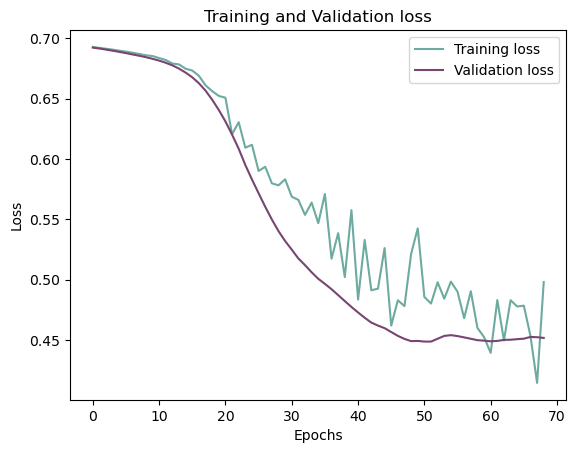

In [32]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

Plotting training and validation accuracy over epochs

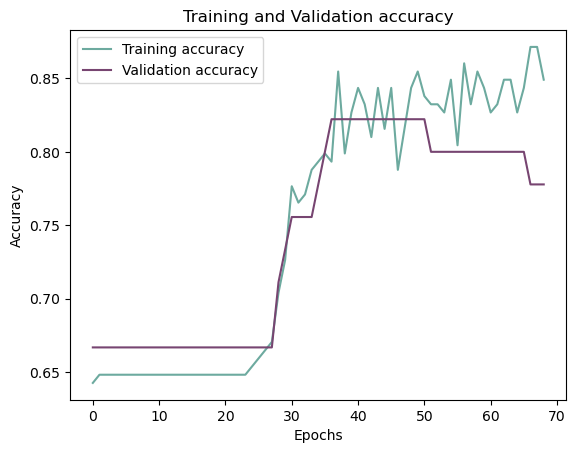

In [33]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Results and Final Takeaways

After training the model, we assess its performance using the test dataset. The evaluation steps include:

* Testing on the Test Set – Use the held-out test data to evaluate how well the model generalizes to unseen examples.
* Confusion Matrix – Analyze true positives, true negatives, false positives, and false negatives to understand the model’s classification behavior.
* Classification Report – Examine key metrics such as precision, recall, F1-score, and accuracy to get a comprehensive view of model performance.

These evaluation steps provide a clear understanding of the ANN’s predictive capability and reliability for heart failure prediction.

In [34]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


<Axes: >

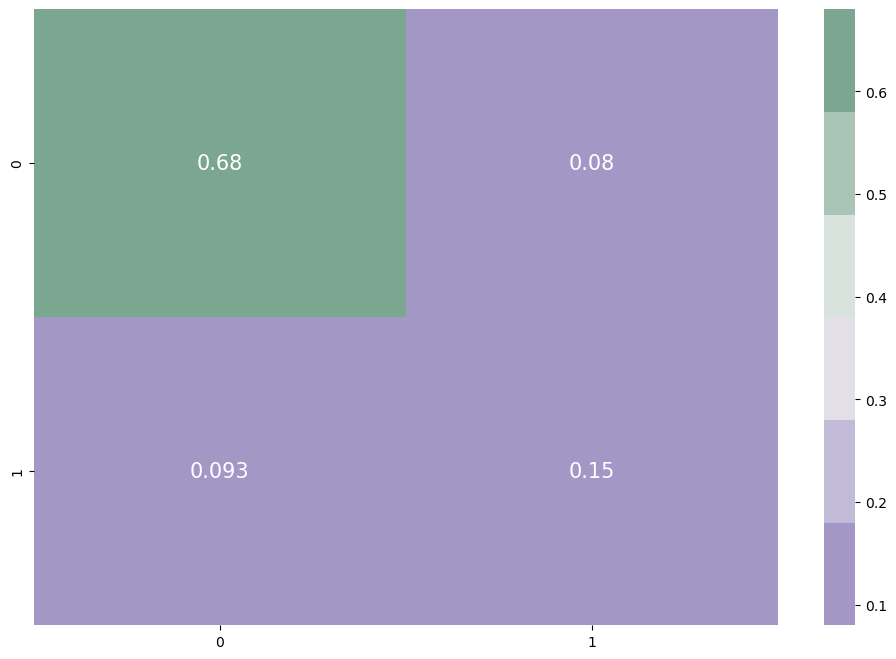

In [35]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89        57
           1       0.65      0.61      0.63        18

    accuracy                           0.83        75
   macro avg       0.76      0.75      0.76        75
weighted avg       0.82      0.83      0.82        75



##### Final Conclusion – Heart Failure Prediction Using ANN
The project successfully demonstrated how Artificial Neural Networks (ANNs) can be applied to predict heart failure risks using structured clinical data. Through data preprocessing, model training, and evaluation, several meaningful insights were uncovered:

1. Model Architecture & Training:

* A Sequential ANN model was implemented with multiple Dense layers, ReLU activation functions in the hidden layers, and a sigmoid activation in the output layer to perform binary classification.

* The model was compiled with the Adam optimizer and binary cross-entropy loss function, enabling stable convergence during training.

2. Model Performance:

* Training and validation accuracy curves indicated good learning progression without severe overfitting.

* The model achieved a strong validation accuracy (as observed in the plotted metrics) and consistent performance across the test dataset.

* Evaluation through confusion matrix and classification report revealed balanced predictions, with satisfactory precision, recall, and F1-scores across both classes.

3. Interpretation of Results:

* The ANN was able to detect underlying patterns and relationships among key clinical variables such as age, ejection fraction, serum creatinine, and blood pressure, which are known risk indicators of heart failure.

* Despite being trained on synthetic data, the model’s ability to generalize to unseen samples suggests that such architectures can be promising tools for early-stage heart failure risk assessment.

4. Key Takeaways:

* The project validated that even a relatively simple ANN can effectively capture nonlinear health data patterns.

* Real-world implementation would require larger, high-quality, and diverse datasets and careful model validation to ensure clinical reliability.

The learnings from this project build a foundation for exploring more advanced deep learning models (like CNNs or LSTMs) or hybrid architectures in future healthcare applications.